<a href="https://colab.research.google.com/github/farazjawedd/Explainable-AI/blob/main/xAI_Assignment_2_Interpretable_ML.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Initial setup

In [2]:
!pip install pygam

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.4/60.4 kB 2.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 522.0/522.0 kB 10.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 36.4/36.4 MB 27.4 MB/s eta 0:00:00
  Attempting uninstall: scipy
    Found existing installation: scipy 1.13.1
    Uninstalling scipy-1.13.1:
      Successfully uninstalled scipy-1.13.1


Loading libraries and reading the dataset

In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.metrics import mean_squared_error, accuracy_score, classification_report
from pygam import GAM, s, f

# Load the dataset
df = pd.read_csv('/content/telco.csv')

In [8]:
df

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes


# EDA

Initial data exploration:
- Data type of the columns
- Some descriptive statistics of the columns
- Proportion of the churn column - to check the balance of the outcome variable

In [9]:
print(df.info())
print(df.describe())
print(df['Churn'].value_counts(normalize=True))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


Checking for missing values

In [10]:
print(df.isnull().sum())

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64


Plots of a few columns

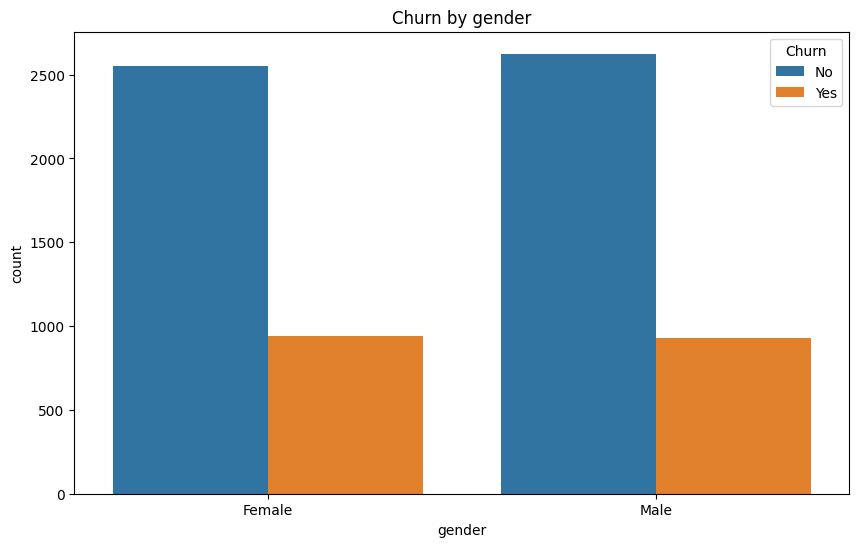

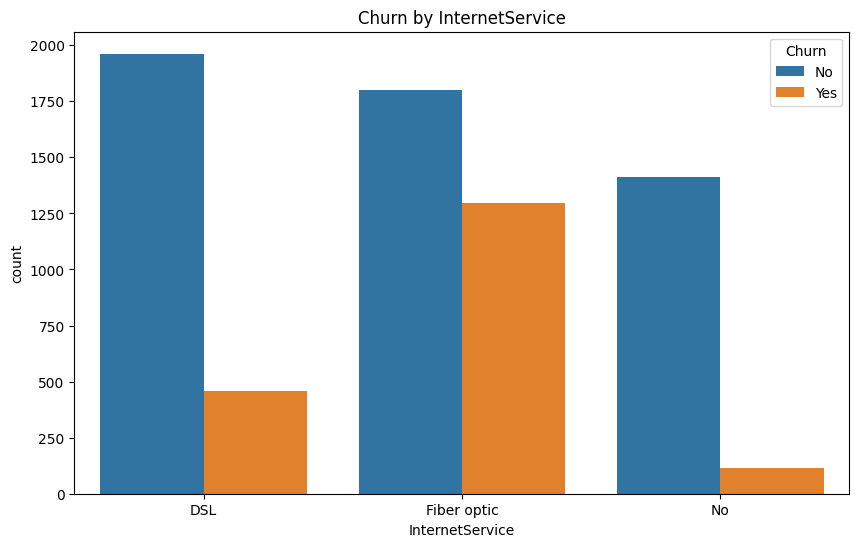

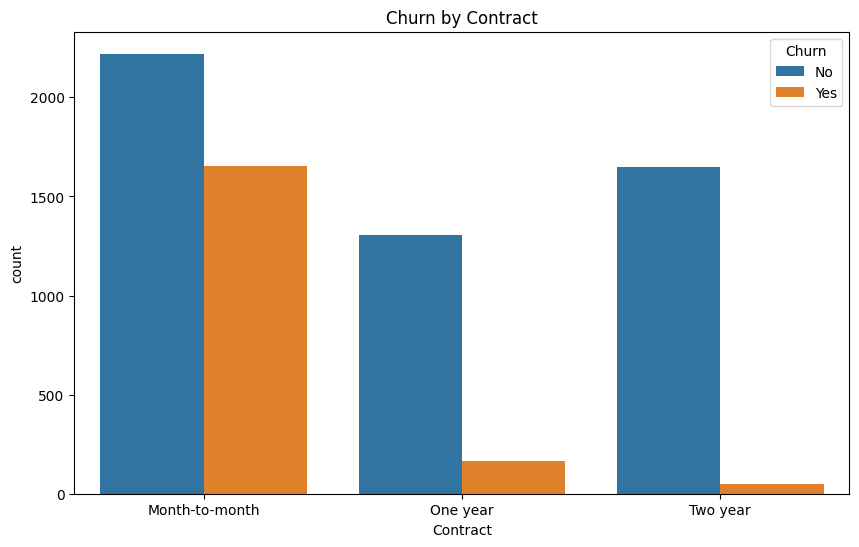

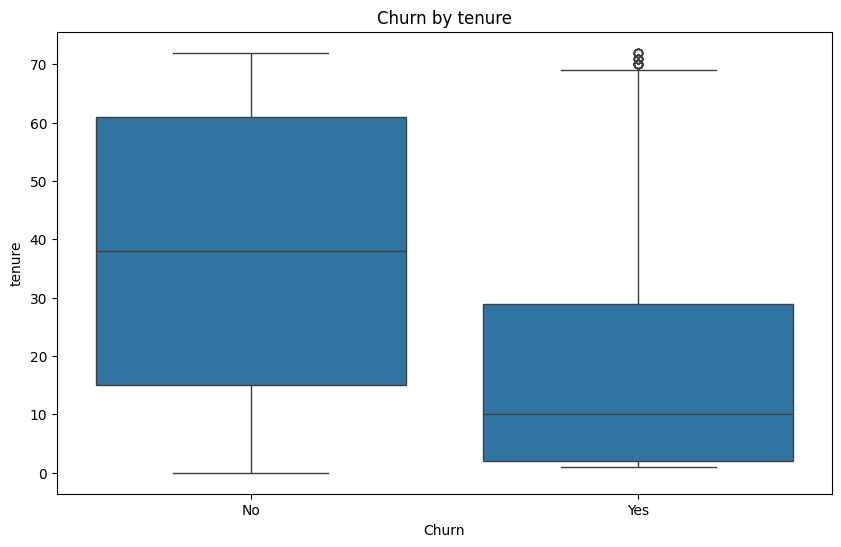

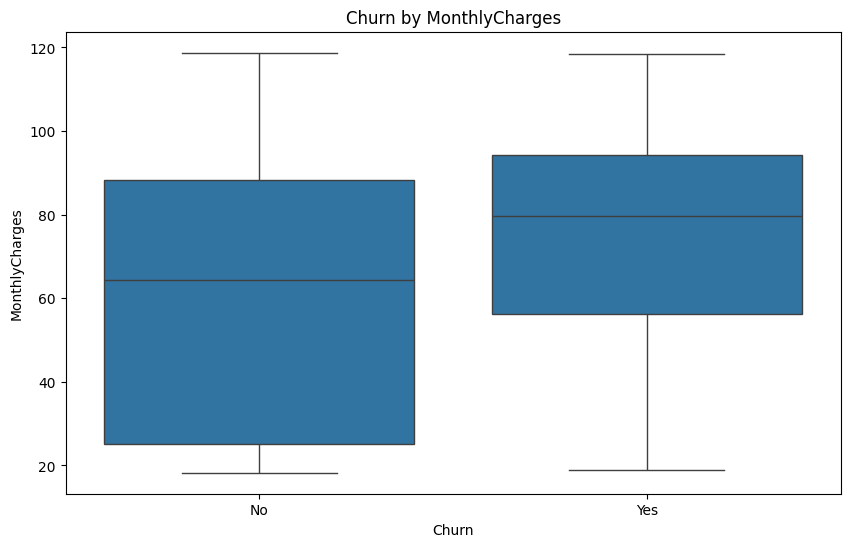

In [13]:
# Categorical features
cat_features = ['gender', 'InternetService', 'Contract']
for feature in cat_features:
    plt.figure(figsize=(10, 6))
    sns.countplot(x=feature, hue='Churn', data=df)
    plt.title(f'Churn by {feature}')
    plt.show()

# Numerical features
num_features = ['tenure', 'MonthlyCharges']
for feature in num_features:
    plt.figure(figsize=(10, 6))
    sns.boxplot(x='Churn', y=feature, data=df)
    plt.title(f'Churn by {feature}')
    plt.show()

How are the tenure and Monthly Charges features co-related? Just checking

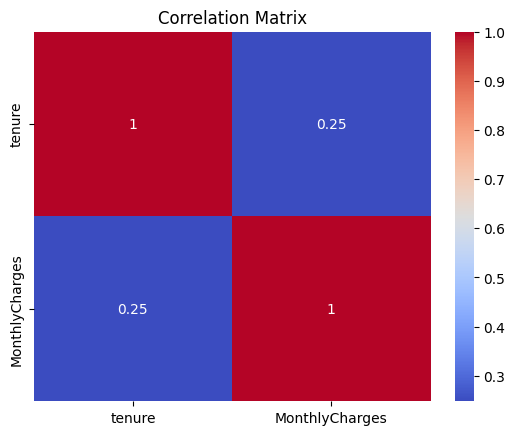

In [14]:
correlation_matrix = df[num_features].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

# Linear Regression

In [15]:
X = df.drop(['Churn', 'customerID'], axis=1)
y = df['Churn'].map({'Yes': 1, 'No': 0})

X = pd.get_dummies(X, drop_first=True)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [16]:
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)

y_pred = lr_model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error: {mse}')

# Interpret coefficients
coefficients = pd.DataFrame({'Feature': X.columns, 'Coefficient': lr_model.coef_})
print(coefficients.sort_values('Coefficient', ascending=False))

Mean Squared Error: 0.2226736649483885
                   Feature  Coefficient
860    TotalCharges_1448.8     1.171321
1834      TotalCharges_219     1.152079
874     TotalCharges_146.3     1.116872
1033   TotalCharges_156.25     1.109605
2454     TotalCharges_28.3     1.100097
...                    ...          ...
1659   TotalCharges_2006.1    -1.109009
4026  TotalCharges_4729.75    -1.115207
5224   TotalCharges_6470.1    -1.127426
2347     TotalCharges_2665    -1.128286
3196   TotalCharges_3673.6    -1.132637

[6559 rows x 2 columns]


# Logistic Regression

In [17]:
log_model = LogisticRegression()
log_model.fit(X_train, y_train)

y_pred = log_model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy}')
print(classification_report(y_test, y_pred))

# Interpret coefficients
log_coefficients = pd.DataFrame({'Feature': X.columns, 'Coefficient': log_model.coef_[0]})
print(log_coefficients.sort_values('Coefficient', ascending=False))

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Accuracy: 0.8140525195173882
              precision    recall  f1-score   support

           0       0.86      0.90      0.88      1036
           1       0.67      0.58      0.62       373

    accuracy                           0.81      1409
   macro avg       0.76      0.74      0.75      1409
weighted avg       0.81      0.81      0.81      1409

                 Feature  Coefficient
1638   TotalCharges_20.2     1.217148
1644   TotalCharges_20.5     0.721604
3844   TotalCharges_45.3     0.652496
1520   TotalCharges_19.9     0.572557
3850   TotalCharges_45.7     0.559205
...                  ...          ...
3762     TotalCharges_44    -0.492373
18       TechSupport_Yes    -0.492829
12    OnlineSecurity_Yes    -0.612828
23     Contract_One year    -0.656683
24     Contract_Two year    -3.142331

[6559 rows x 2 columns]


# Generalized Additive Model (GAM)

In [18]:
gam = GAM(s(0) + s(1) + f(2) + f(3))
gam.fit(X_train, y_train)

y_pred = gam.predict(X_test)
y_pred_binary = (y_pred > 0.5).astype(int)
accuracy = accuracy_score(y_test, y_pred_binary)
print(f'Accuracy: {accuracy}')
print(classification_report(y_test, y_pred_binary))

# Interpret GAM
plt.figure(figsize=(20, 10))
gam.plot(n_cols=2)
plt.tight_layout()
plt.show()

Accuracy: 0.7601135557132718
              precision    recall  f1-score   support

           0       0.81      0.88      0.84      1036
           1       0.56      0.42      0.48       373

    accuracy                           0.76      1409
   macro avg       0.69      0.65      0.66      1409
weighted avg       0.74      0.76      0.75      1409



AttributeError: 'GAM' object has no attribute 'plot'

<Figure size 2000x1000 with 0 Axes>